# Housing Prices: Advanced Regression Techniques

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

# Handling the missing values

In [5]:
#find missing values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

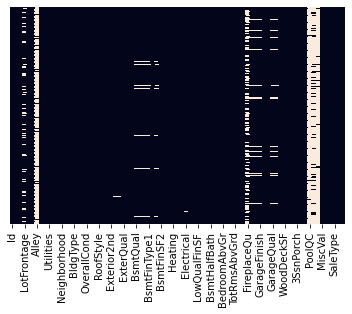

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Fill missing values

#From above, LotFrontage has 259 missing values, next step is to fill these values, since the dtype is int/float so mean is used

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [9]:
#Since alley has 91 non-null value, so we'll remove this feature

df.drop(['Alley'], axis=1, inplace=True)
df.drop(['FireplaceQu'], axis=1, inplace=True)
df.drop(['PoolQC'], axis=1, inplace=True)
df.drop(['Fence'], axis=1, inplace=True)
df.drop(['MiscFeature'], axis=1, inplace=True)
df.drop(['Id'], axis=1, inplace=True)

In [10]:
#the dtype is object i.e. categorical feature so mode is used

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0]) 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0]) 
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0]) 
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0]) 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]) 
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 

In [11]:
df.shape

(1460, 75)

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handling the categorical features

In [13]:
# list of categorical (dtype=objects) features

columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [14]:
len(columns)

38

In [15]:
# 'BsmtCond' feature has 4 categorical features (TA, Gd, Fa, Po)
df['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [16]:
# Handling all the features and converting into categorical features

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [17]:
main_df = df.copy()

In [18]:
# Combine test and train data row wise

test_df = pd.read_csv('formulatedtest.csv')
final_df = pd.concat([df, test_df], axis=0)

In [19]:
pd.set_option('display.max_rows', None)
df.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    70.049958    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60    

In [20]:
pd.set_option('display.max_rows', None)
final_df.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    70.049958    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60    

In [21]:
final_df.shape

(2919, 75)

In [22]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [23]:
final_df.shape

(2919, 233)

In [24]:
# remove duplicate entries

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [25]:
final_df.shape

(2919, 177)

In [26]:
# to view categorical features
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


# Apply Algorithm

In [27]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [28]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Jadon\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_test.shape

(1459, 176)

In [30]:
# x_train contains every feature except saleprice and y_train only contains saleprice
x_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train['SalePrice']

In [31]:
## OPTION 1

# XGBoost is an implementation of gradient boosted decision trees designed for speed and performance
# import xgboost
# classifier = xgboost.XGBRegressor()
# classifier.fit(x_train,y_train)

In [32]:
## OPTION 2

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [33]:
reg.coef_

array([-7.26238617e+01,  8.47260198e+01,  4.77037196e-01,  7.85961449e+03,
        5.86829347e+03,  2.80688711e+02,  8.90067843e+01,  1.36334665e+01,
        1.77203580e+01,  4.08407296e+00, -3.37490144e+00,  1.84296960e+01,
        1.20538057e+01,  3.02569860e+01, -6.31481825e+00,  3.59962067e+01,
        2.74983977e+03, -2.48939243e+01,  2.99459374e+03,  1.77175783e+03,
       -5.21708594e+03, -1.80026187e+04,  2.60828562e+03,  4.50072639e+03,
        8.82648815e+01,  4.90907897e+03,  7.34972390e+00,  1.19201179e+01,
        1.17929359e+01,  7.94543604e+00,  5.03406998e+01,  3.73683294e+01,
        8.29071107e+01, -1.39880261e+00, -6.61475107e+02,  1.87522815e+01,
        2.94516425e+04,  2.71166348e+04,  3.01671260e+04,  2.54759950e+04,
        3.07090081e+04,  7.63544134e+03,  9.82720531e+03,  1.50241618e+03,
        1.69372919e+04, -2.16986301e+03,  1.12363663e+04, -3.71243148e+04,
        9.58109233e+03, -5.75768127e+03, -1.53716967e+04, -6.06277164e+02,
        9.43397293e+03, -

In [38]:
import pickle
filename = "finalized_model.pkl"
pickle.dump(reg,open(filename,"wb"))

In [39]:
y_pred = reg.predict(df_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
# Create sample submission file and submit it

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred], axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)